# <font style="color:rgb(50,120,229)">Creating an Image Mask </font>
Masking is a very important step in many image processing and computer vision algorithms. The goal is to segment out the area of interest and apply your algorithm to a specific part of the image. You can perform all operations on this segmented part of the image and put it back on the original image.

## <font style="color:rgb(50,120,229)">Create a mask using coordinates</font>

In [1]:
# Import libraries
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
# Read image
image = cv2.imread(DATA_PATH+"images/boy.jpg")

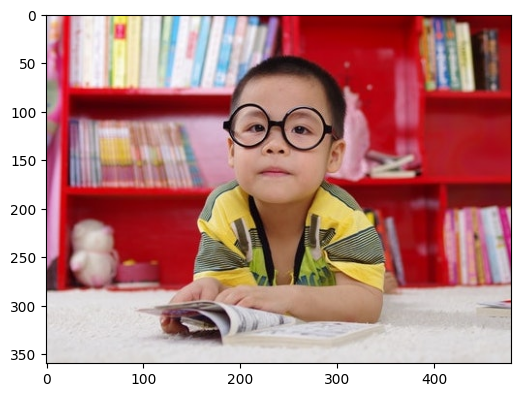

In [4]:
# Let's see what image we are dealing with
plt.imshow(image[:,:,::-1])

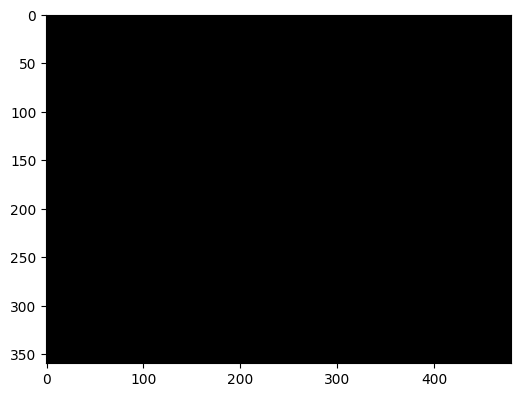

In [5]:
# Create an empty image of same size as the original
mask1 = np.zeros_like(image)
plt.imshow(mask1)

uint8


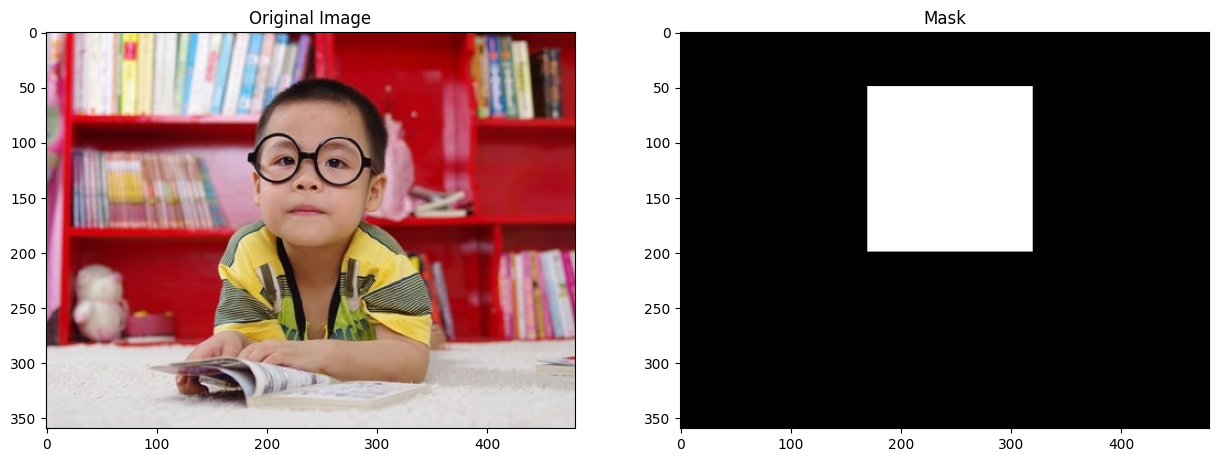

In [6]:
mask1[50:200,170:320] = 255
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(mask1[:,:,::-1]);plt.title("Mask")
print(mask1.dtype)

This is the mask for the face region of the input image

## <font style="color:rgb(50,120,229)">Create a mask using pixel intensity or color</font>
Another way of creating masks is by using some logic. One example is using a simple color information. For example, Let us try to find out the pixels which are approximately red in color.

If we want to focus on `red pixels`, the simplest logic that does the trick is:
```
* The red channel should have high intensity ( keep the range of pixel values from 100 to 255 )
* The other 2 channels should have low intensity ( keep the range of pixel values in Blue and Green channels between 0 to 100)
```
There is a nice OpenCV function which can do exactly this. We will use the opencv function [**`inRange`**](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)

#### <font style="color:rgb(8,133,37)">Function Syntax</font> 
It finds the pixels which lie in between the specified range. It produces a binary output image in which the white pixels corresspond to those pixels in the input image which fall in the specified range. The pixel values which fall outside the specified range are black `(0)`
```Python:
dst	=	cv2.inRange(	src, lowerb, upperb[, dst]	)
```

**Parameters**
- **`src`** - first input array.
- **`lowerb`** - inclusive lower boundary array or a scalar.
- **`upperb`** - inclusive upper boundary array or a scalar.
- **`dst`** - output array of the same size as src and CV_8U type.

It produces a binary image ( pixels are either black or white ).



Text(0.5, 1.0, 'Masked Image')

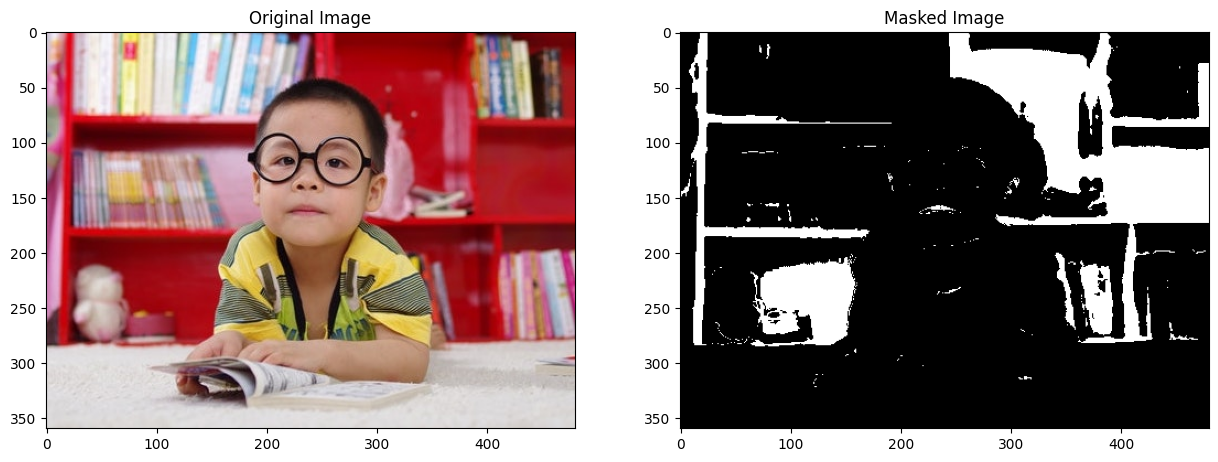

In [7]:
mask2 = cv2.inRange(image, (0,0,150), (100,100,255))
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(mask2);plt.title("Masked Image")

As you can see the white portion in the output mask corressponds to the red pixels in the original image. 

We will discuss more about color based masking in later modules.